In [2]:
## Importing Libraries ##
library(MOFA2)
library(dplyr)
library(data.table)
library(purrr)
library(ggplot2)
library(cowplot)
library(ReactomeGSA)
library(GGally)
library(data.table)
library(purrr)
library(ggplot2)
library(cowplot)
library(enrichR)
library(MOFAdata)


Attaching package: ‘MOFA2’


The following object is masked from ‘package:stats’:

    predict



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last



Attaching package: ‘purrr’


The following object is masked from ‘package:data.table’:

    transpose


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Welcome to enrichR
Checking connection ... 

Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!



In [3]:
## Data loading ##
### Data Matrix ##
setwd("/Users/macbook/Documents/MOFA/Data_Optimized")
Pheno <- read.csv("meta_data.csv")
Pheno
table(Pheno$survival)

sample,A1C,AG,ALB,ALCRU,ALKP,ALT,AST,BASO,BASOAB,⋯,NEUTAB,NHDL,PLT,RBC,RDW,TBIL,TGL,TP,UALB,survival
<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ZIS22OE.02,5.7,7,3.9,84,26,22,0.5,0.03,13.00,⋯,4.23,12.7,0.5,41,6.8,5.8,69-006,Healthy,,Healthy
ZJOSZHK.01,5.1,9,4.0,78.3,56,63,30,0.50,0.03,⋯,3.66,56,165,4.03,13.5,0.3,34,6.3,<5,Healthy
ZJOSZHK.02,5.4,5,4.3,27,61,55,24,0.70,0.06,⋯,5.50,63,207,4.4,14.8,0.2,53,6.9,<5,Healthy
ZJTKAE3.02,5.5,6,3.9,99,39,27,0.5,0.03,19.00,⋯,241.00,4.69,14.6,0.3,61,7.2,5.9,70-1015,Weight-gain,Healthy
ZJTKAE3.03,5.4,5,4.1,80,41,28,0.7,0.04,13.00,⋯,244.00,4.84,14.5,0.4,112,7.7,5.3,70-1015,Weight-loss,Healthy
ZJTKAE3.04,5.2,8,4.1,80,27,23,0.7,0.03,13.00,⋯,211.00,4.89,15.4,0.4,56,7.4,5.2,70-1015,Healthy,Healthy
ZJTKAE3.06,5.5,12,4.0,67,31,25,0.9,0.05,13.00,⋯,242.00,5.07,14.6,0.4,103,7.6,5.1,70-1015,Healthy,Healthy
ZJTKAE3.07,5.3,10,4.1,126.1,69,60,33,1.00,0.05,⋯,2.87,117,230,4.9,14.6,0.5,62,7.4,6,Healthy
ZJTKAE3.10,5.2,8,4.1,80.7,65,33,23,1.00,0.05,⋯,3.16,106,212,5.06,14.3,0.5,67,7.2,5,Healthy



  Healthy Infection 
      605       360 

In [4]:
#### Data Matrix Import ###
protiomics <- as.matrix(read.csv("Normalized_data_protiomics.csv", fill = T, header = T, row.names = 1))

#mirna
metabolomics <- as.matrix(read.csv("Normalized_data_metabolom_1.csv", fill = T, header = T,  row.names = 1))

#mRNA
mRNA_data <- as.matrix(read.csv("dega_normalized.csv", fill = T, header = T,  row.names = 1))


In [5]:
Pheno

sample,A1C,AG,ALB,ALCRU,ALKP,ALT,AST,BASO,BASOAB,⋯,NEUTAB,NHDL,PLT,RBC,RDW,TBIL,TGL,TP,UALB,survival
<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ZIS22OE.02,5.7,7,3.9,84,26,22,0.5,0.03,13.00,⋯,4.23,12.7,0.5,41,6.8,5.8,69-006,Healthy,,Healthy
ZJOSZHK.01,5.1,9,4.0,78.3,56,63,30,0.50,0.03,⋯,3.66,56,165,4.03,13.5,0.3,34,6.3,<5,Healthy
ZJOSZHK.02,5.4,5,4.3,27,61,55,24,0.70,0.06,⋯,5.50,63,207,4.4,14.8,0.2,53,6.9,<5,Healthy
ZJTKAE3.02,5.5,6,3.9,99,39,27,0.5,0.03,19.00,⋯,241.00,4.69,14.6,0.3,61,7.2,5.9,70-1015,Weight-gain,Healthy
ZJTKAE3.03,5.4,5,4.1,80,41,28,0.7,0.04,13.00,⋯,244.00,4.84,14.5,0.4,112,7.7,5.3,70-1015,Weight-loss,Healthy
ZJTKAE3.04,5.2,8,4.1,80,27,23,0.7,0.03,13.00,⋯,211.00,4.89,15.4,0.4,56,7.4,5.2,70-1015,Healthy,Healthy
ZJTKAE3.06,5.5,12,4.0,67,31,25,0.9,0.05,13.00,⋯,242.00,5.07,14.6,0.4,103,7.6,5.1,70-1015,Healthy,Healthy
ZJTKAE3.07,5.3,10,4.1,126.1,69,60,33,1.00,0.05,⋯,2.87,117,230,4.9,14.6,0.5,62,7.4,6,Healthy
ZJTKAE3.10,5.2,8,4.1,80.7,65,33,23,1.00,0.05,⋯,3.16,106,212,5.06,14.3,0.5,67,7.2,5,Healthy


In [17]:
#match and check if they are matching
Pheno <- Pheno[match(colnames(mRNA_data), rownames(Pheno)), ]
all(rownames(Pheno) == colnames(mRNA_data))

[1] TRUE

In [19]:
## Protiome Matching ##
Pheno <- Pheno[match(colnames(protiomics), rownames(Pheno)), ]
all(rownames(Pheno) == colnames(protiomics))

[1] TRUE

In [4]:
## Metabolomics Matching ##
Pheno <- Pheno[match(colnames(metabolomics), rownames(Pheno)), ]
all(rownames(Pheno) == colnames(metabolomics))

[1] TRUE

In [6]:
############ creating MOFA #################
mofa_data <- make_example_data(
  n_views = 3, 
  n_samples = 965, 
  n_features = 1000, 
  n_factors = 10
)[[1]]
lapply(mofa_data,dim)
mofa_data[[1]] <- mRNA_data
mofa_data[[2]] <- protiomics
mofa_data[[3]] <- metabolomics
names(mofa_data) <- c("mRNA", "protiomics", "metabolomics")
# Assuming you have two views stored as data frames df1 and df2
all(colnames(protiomics) == colnames(metabolomics))  # This should return TRUE

$view_1
[1] 1000  965

$view_2
[1] 1000  965

$view_3
[1] 1000  965

[1] TRUE

In [8]:
# Define a standard order based on one of your data frames
standard_order <- colnames(mRNA_data)

# Apply this order to all other data frames
protiomics <- protiomics[, standard_order]
metabolomics <- metabolomics[, standard_order]


Creating MOFA object from a list of matrices (features as rows, sample as columns)...




Untrained MOFA model with the following characteristics: 
 Number of views: 3 
 Views names: mRNA protiomics metabolomics 
 Number of features (per view): 965 302 724 
 Number of groups: 1 
 Groups names: group1 
 Number of samples (per group): 965 
 

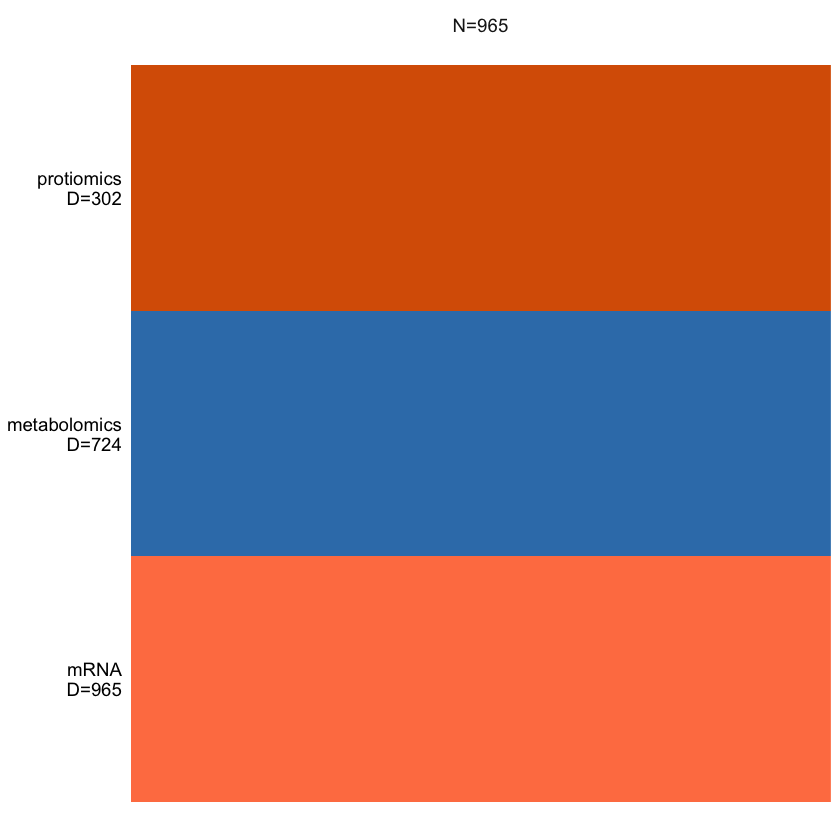

In [7]:
#Create mofa object
MOFA_object <- create_mofa(mofa_data, extract_metadata = F)
MOFA_object

# Continue for all views
plot_data_overview(MOFA_object)


In [9]:
#### data options
data_opts <- get_default_data_options(MOFA_object)
data_opts
#### Model options and after exploration we reduced factors to 7 
model_opts <- get_default_model_options(MOFA_object)
model_opts$num_factors = 10

train_opts <- get_default_training_options(MOFA_object)
train_opts$convergence_mode = "slow" #after exploration of my model



########## Mofa model preparation ###################
MOFA_object <- prepare_mofa(
  object = MOFA_object,
  data_options = data_opts,
  model_options = model_opts,
  training_options = train_opts
)

$scale_views
[1] FALSE

$scale_groups
[1] FALSE

$center_groups
[1] TRUE

$use_float32
[1] TRUE

$views
[1] "mRNA"         "protiomics"   "metabolomics"

$groups
[1] "group1"

Checking data options...

Checking training options...

Checking model options...



In [10]:
################### MOFA RUN ##################
MOFA_object <- run_mofa(MOFA_object, use_basilisk = T)

Warning message in run_mofa(MOFA_object, use_basilisk = T):
“No output filename provided. Using /var/folders/tp/_k0v589n6rz_c3t2nwrsjy_m0000gn/T//RtmpJ4HpJr/mofa_20240516-165030.hdf5 to store the trained model.

”
Connecting to the mofapy2 package using basilisk. 
    Set 'use_basilisk' to FALSE if you prefer to manually set the python binary using 'reticulate'.

2 factors were found to explain no variance and they were removed for downstream analysis. You can disable this option by setting load_model(..., remove_inactive_factors = FALSE)

Warning message in .quality_control(object, verbose = verbose):
“Factor(s) 1, 2 are strongly correlated with the total number of expressed features for at least one of your omics. Such factors appear when there are differences in the total 'levels' between your samples, *sometimes* because of poor normalisation in the preprocessing steps.
”


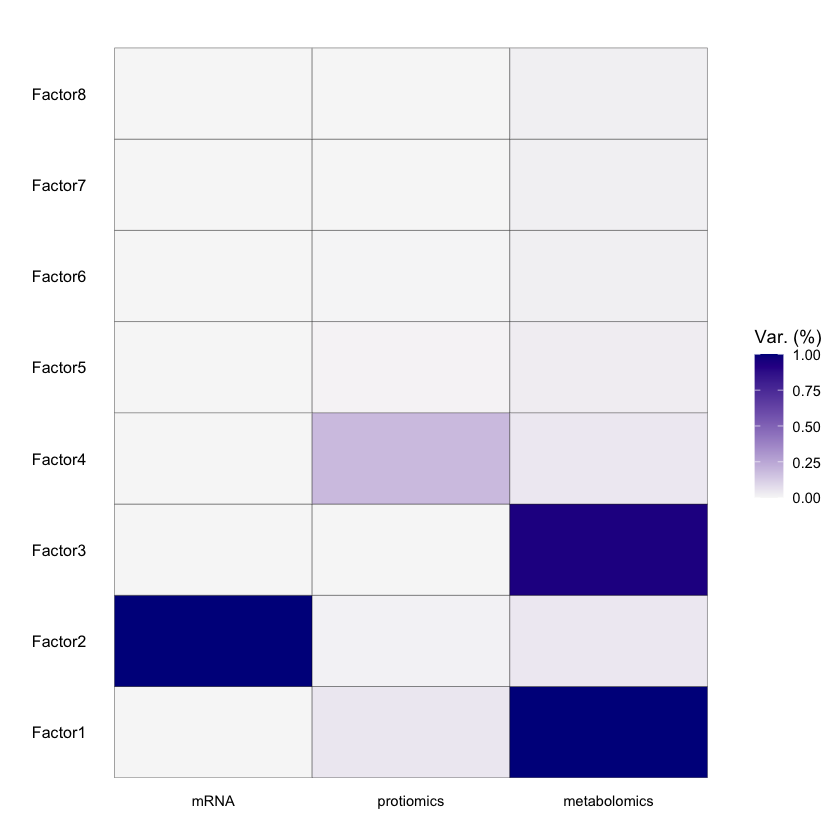

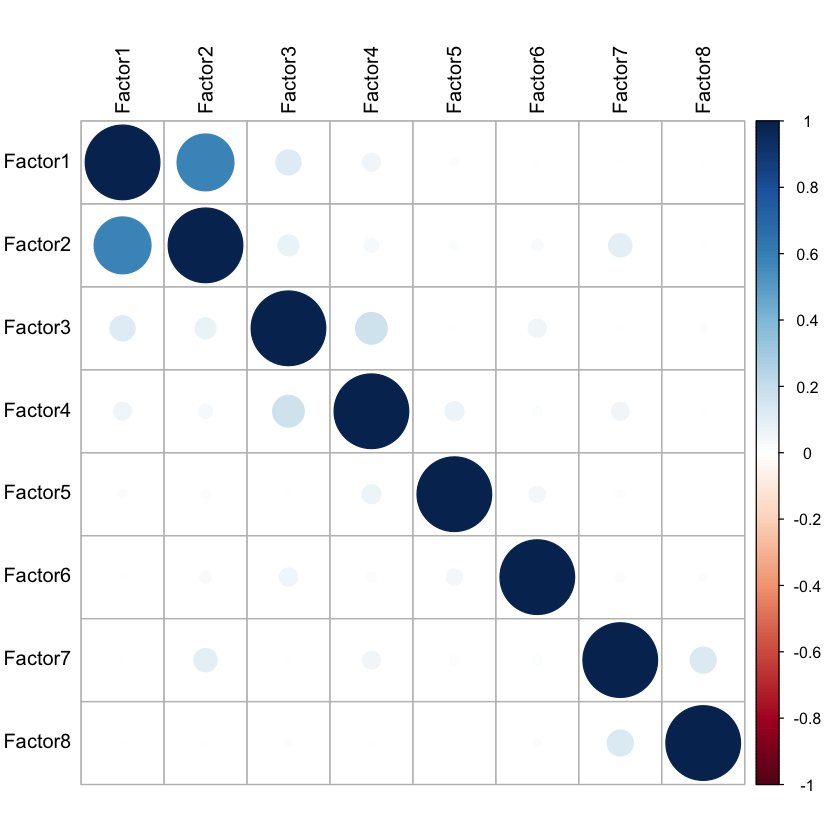

In [11]:
plot_variance_explained(MOFA_object, x="view", y="factor", max_r2=1,plot_total = T)[[1]]
plot_factor_cor(MOFA_object)

In [12]:
#sample_met
samples_metadata(MOFA_object) <- Pheno

In [13]:
########### Analysis MOFA #############
r2 <- get_variance_explained(MOFA_object)
r2$r2_total

r2$r2_per_factor

$group1
        mRNA   protiomics metabolomics 
    40.22732    -17.12272     99.11881

,mRNA,protiomics,metabolomics
Factor1,6.556511e-05,4.506111e-02,97.44729474
Factor2,4.022625e+01,1.127720e-02,0.04206300
Factor3,1.788139e-05,4.172325e-05,0.93945265
Factor4,2.384186e-05,1.852930e-01,0.04081130
Factor5,5.960464e-06,6.461143e-03,0.02649426
Factor6,2.145767e-04,2.866983e-03,0.01834631
Factor7,6.437302e-04,1.758337e-03,0.01803637
Factor8,8.940697e-05,3.278255e-04,0.01897216


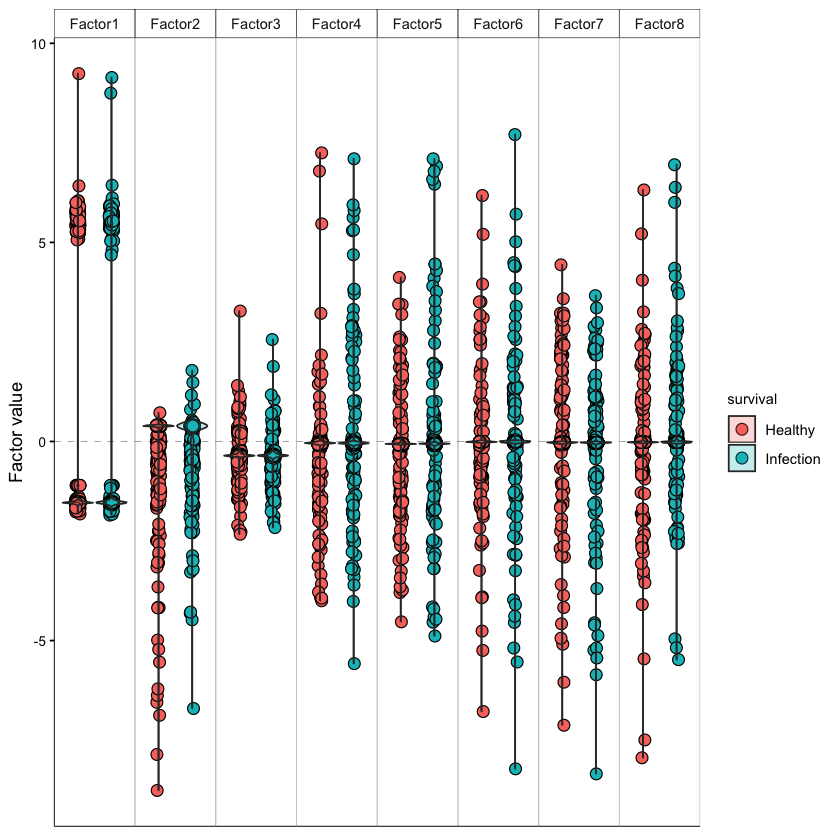

In [14]:
plot_factor(MOFA_object, 
            factors = 1:8 ,
            color_by = "survival",
            dot_size = 3,        
            dodge = T,           
            legend = T,          
            add_violin = T,      
            violin_alpha = 0.25  
)

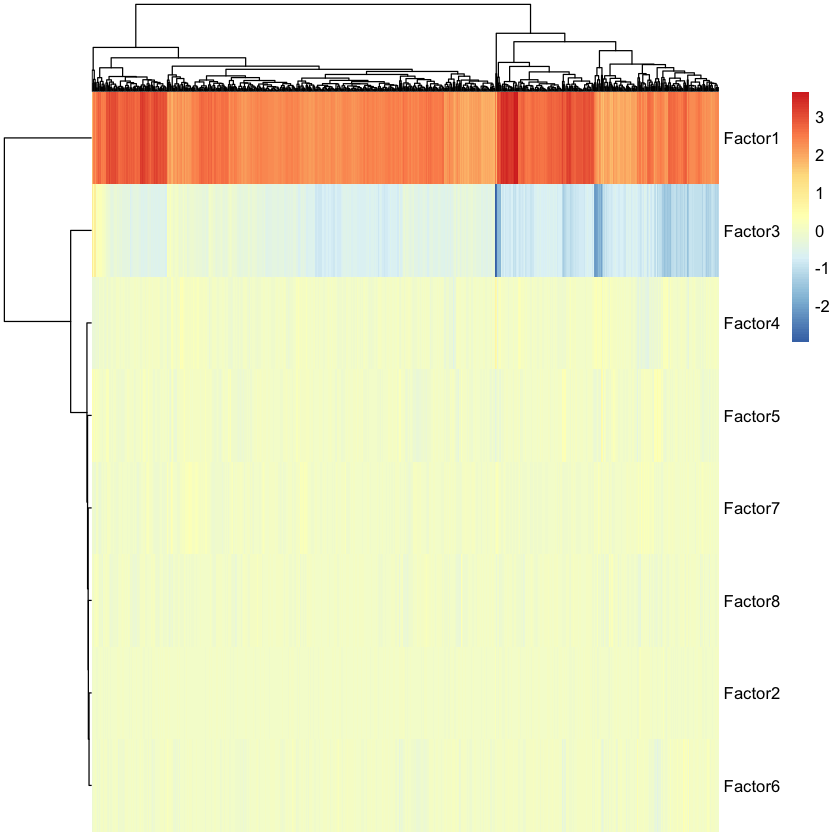

In [15]:
plot_weights_heatmap(
  MOFA_object, 
  view = "metabolomics", 
  factors = 1:8,
  show_colnames = FALSE
)

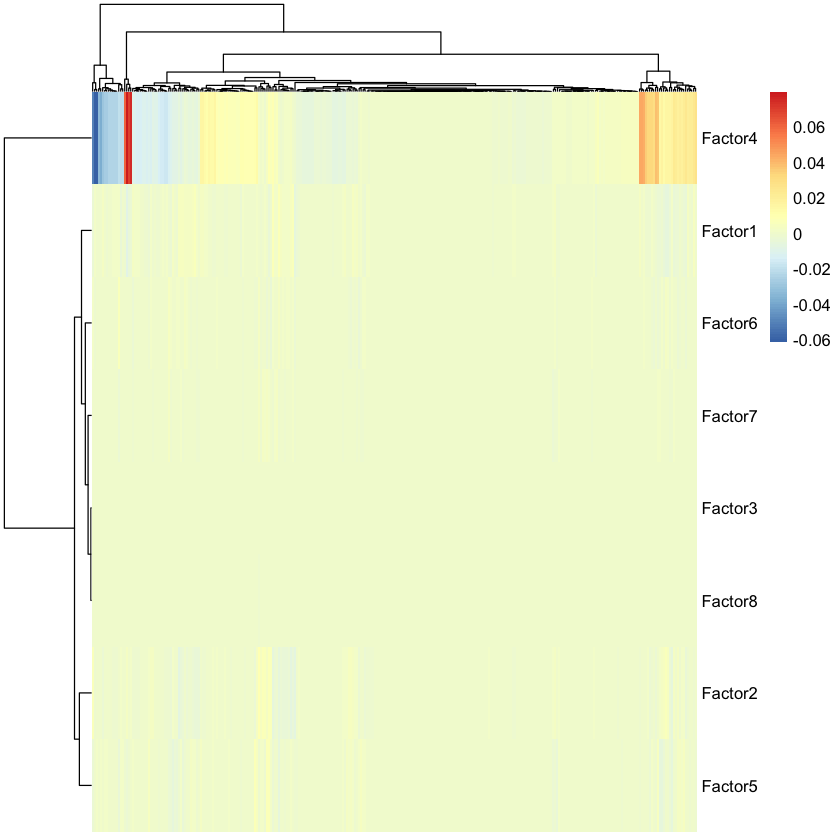

In [16]:
plot_weights_heatmap(
  MOFA_object, 
  view = "protiomics", 
  factors = 1:8,
  show_colnames = FALSE
)

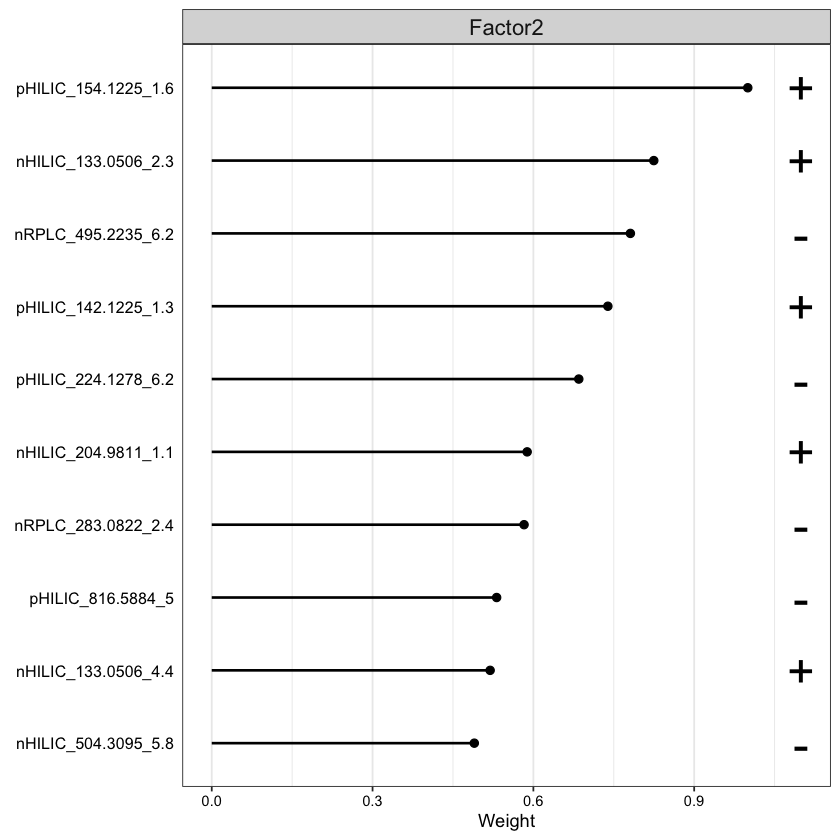

In [17]:
plot_top_weights(
  MOFA_object, 
  view="metabolomics", 
  factor=2
)

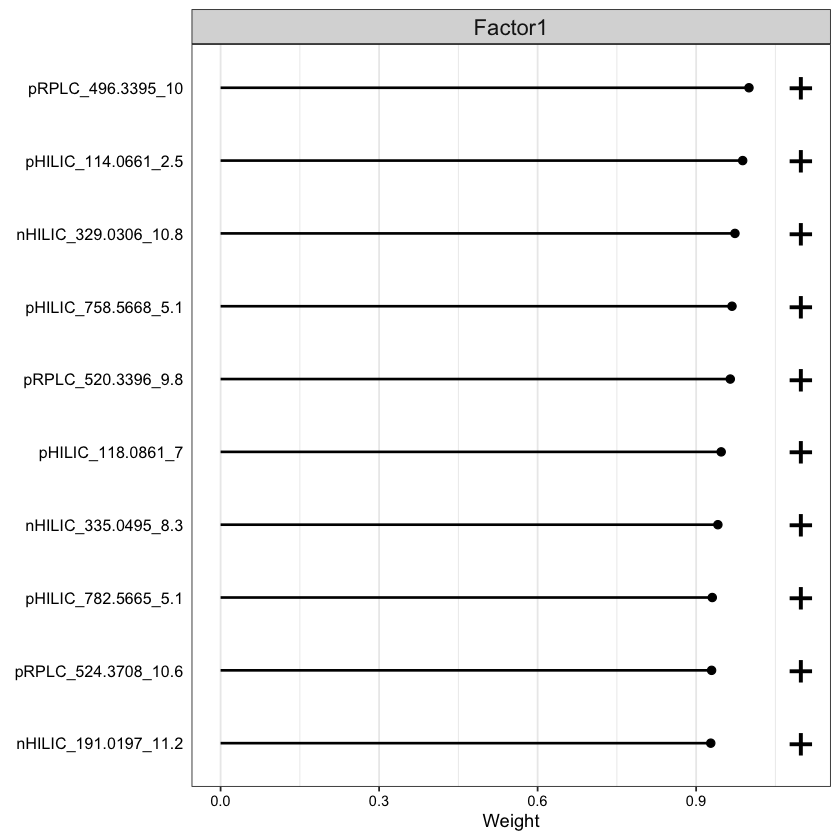

In [18]:
plot_top_weights(
  MOFA_object, 
  view="metabolomics", 
  factor=1
)

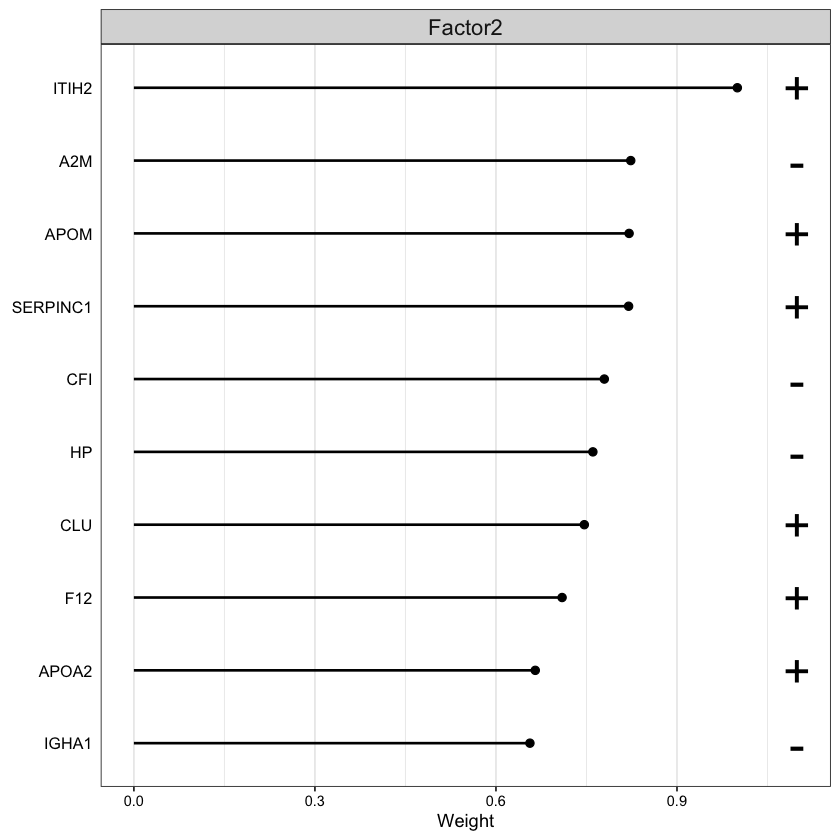

In [19]:
plot_top_weights(
  MOFA_object, 
  view="protiomics", 
  factor=2
)


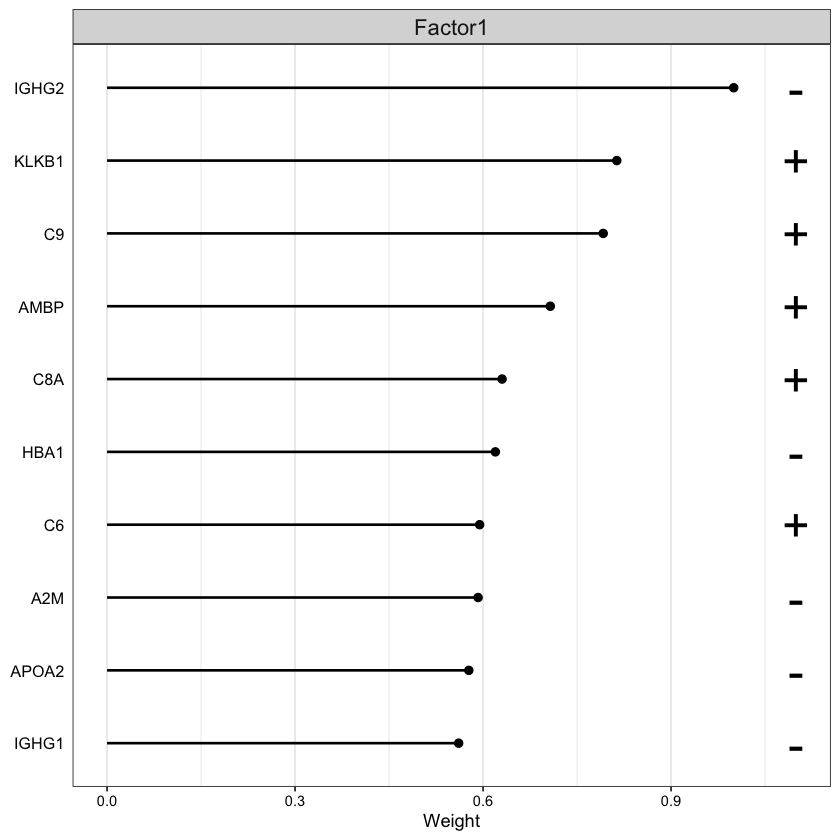

In [20]:
plot_top_weights(
  MOFA_object, 
  view="protiomics", 
  factor=1
)

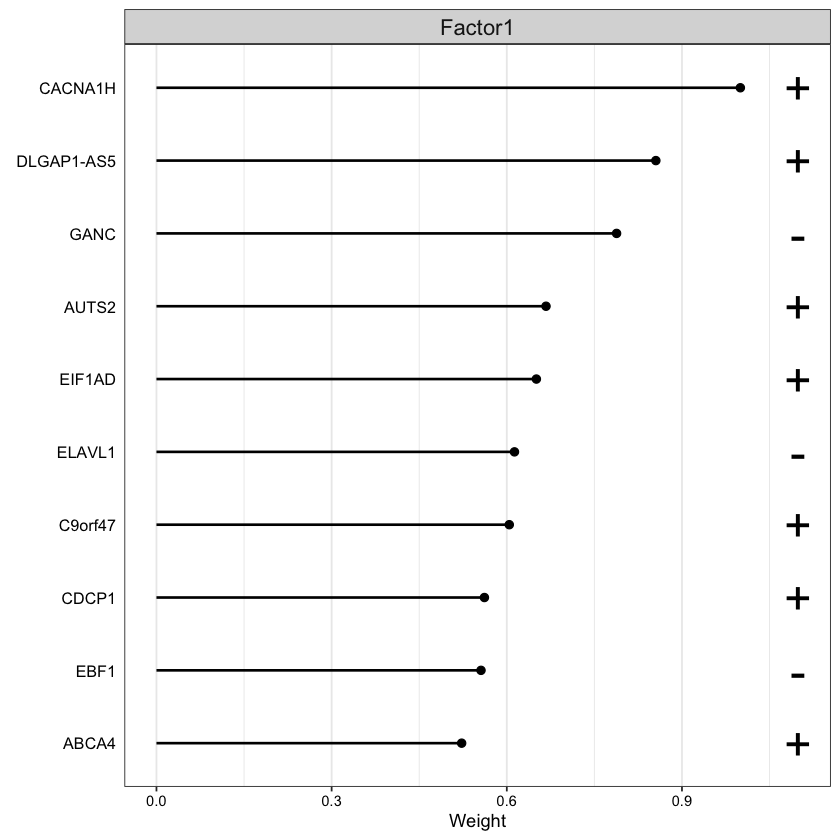

In [21]:
plot_top_weights(
  MOFA_object, 
  view="mRNA", 
  factor=1
)

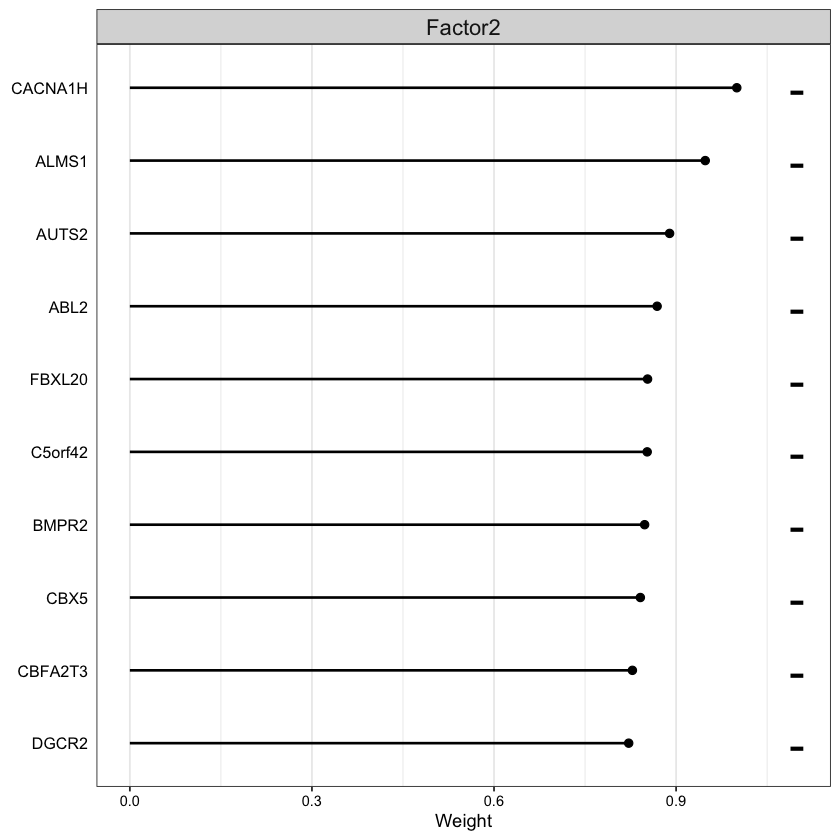

In [22]:
plot_top_weights(
  MOFA_object, 
  view="mRNA", 
  factor=2
)


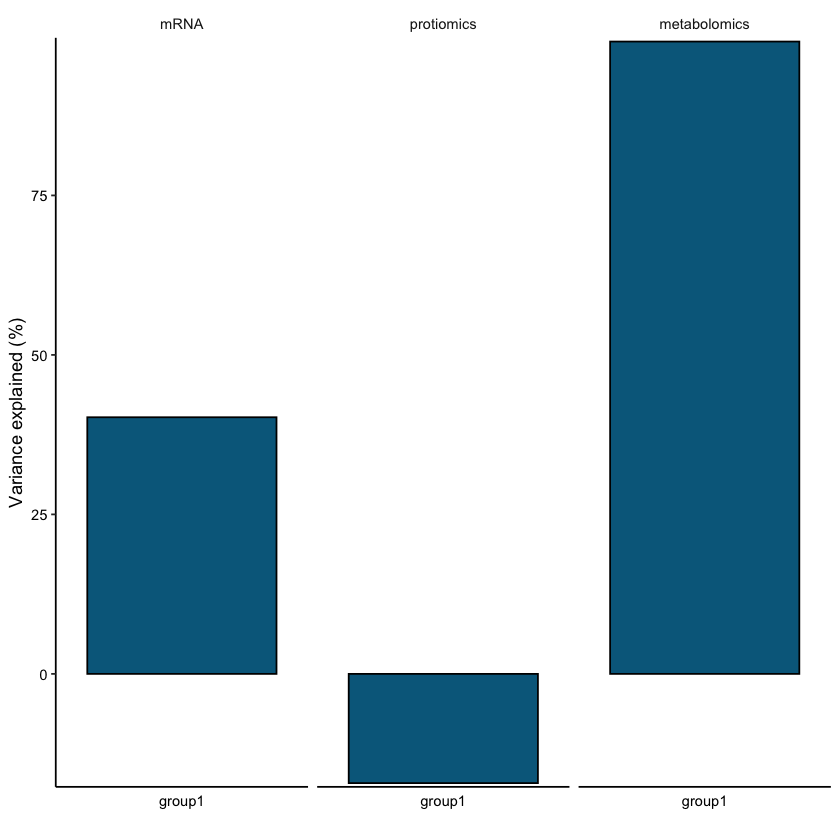

In [23]:
plot_variance_explained(MOFA_object, x="group", y="factor", plot_total = T)[[2]]

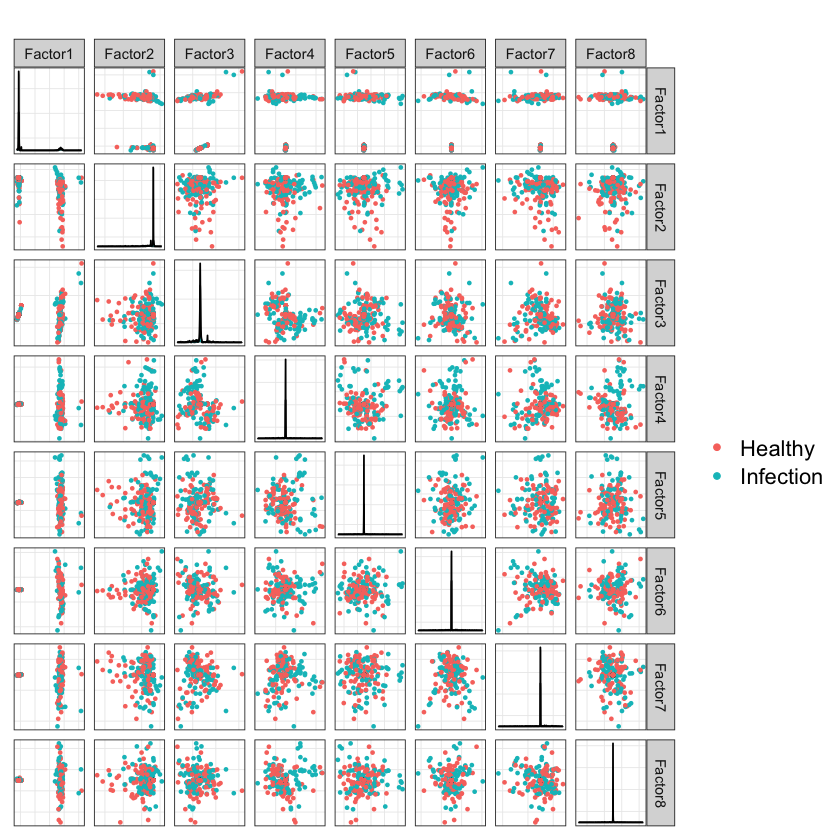

In [24]:
plot_factors(MOFA_object, 
             factors = 1:8,
             color_by = "survival"
)

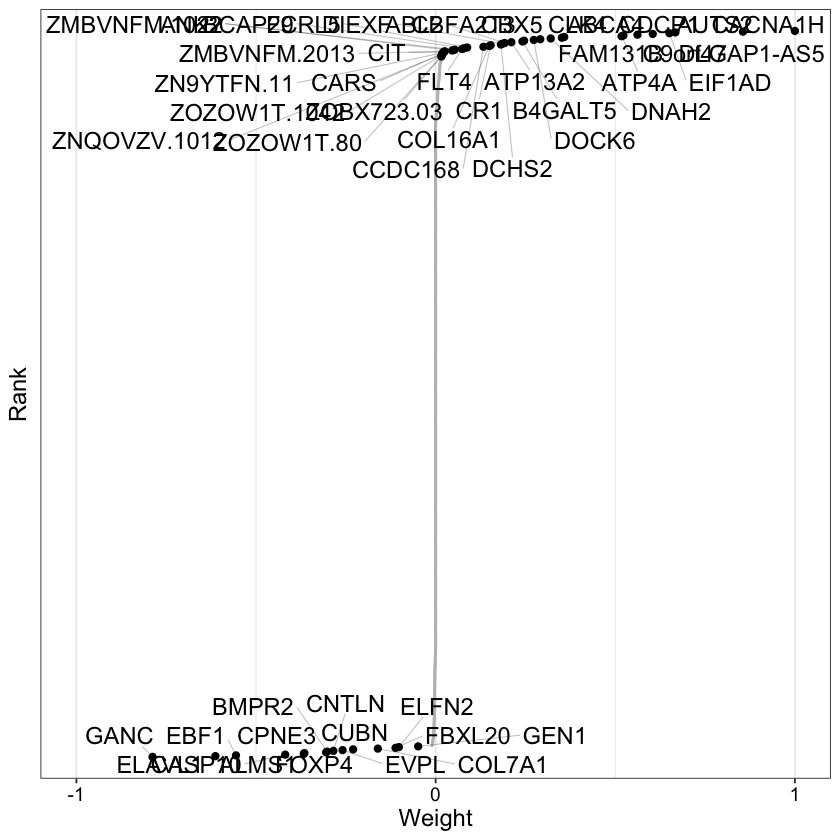

In [25]:
plot_weights(MOFA_object,
             view = "mRNA",
             factor = 1,
             nfeatures = 50,     # Number of features to highlight
             scale = T,          # Scale weights from -1 to 1
             abs = F             # Take the absolute value?
)


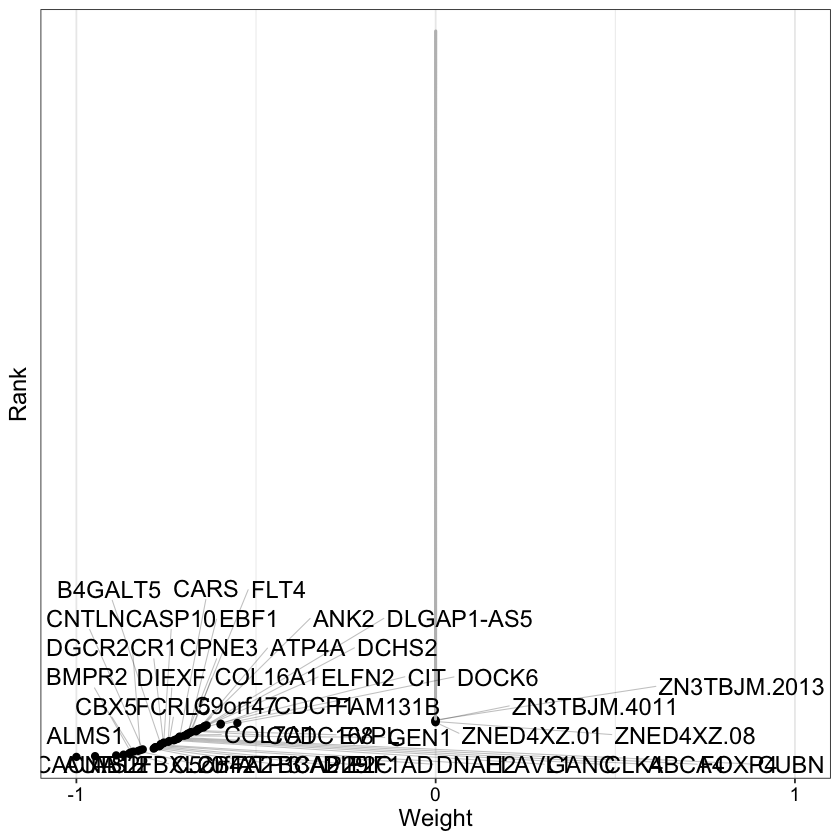

In [26]:
plot_weights(MOFA_object,
             view = "mRNA",
             factor = 2,
             nfeatures = 50,     # Number of features to highlight
             scale = T,          # Scale weights from -1 to 1
             abs = F             # Take the absolute value?
)

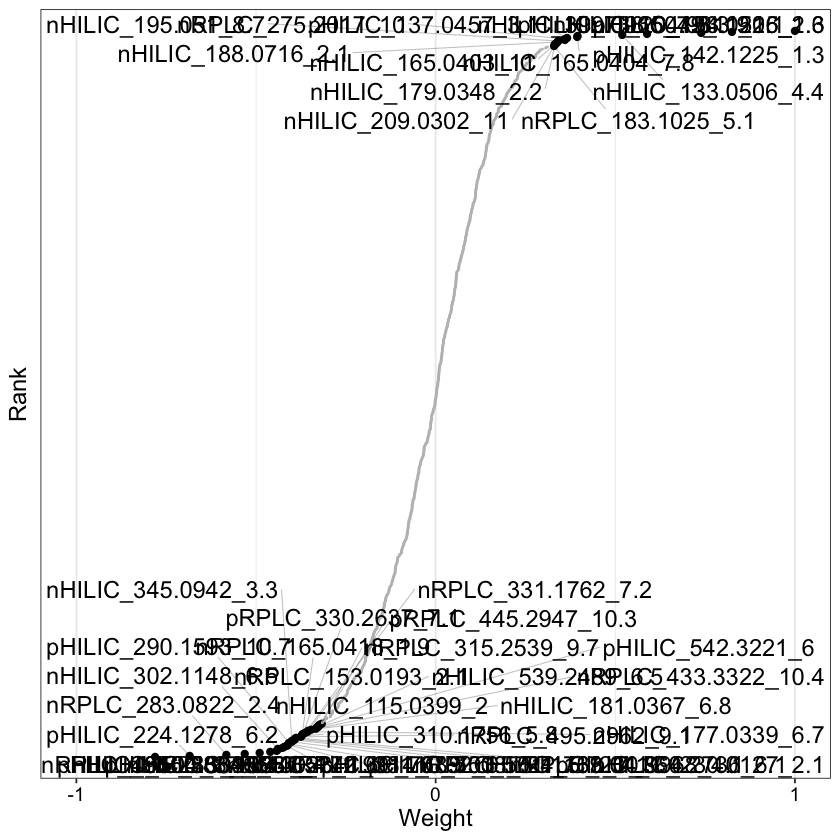

In [27]:
plot_weights(MOFA_object,
             view = "metabolomics",
             factor = 2,
             nfeatures = 50,     # Number of features to highlight
             scale = T,          # Scale weights from -1 to 1
             abs = F             # Take the absolute value?
)

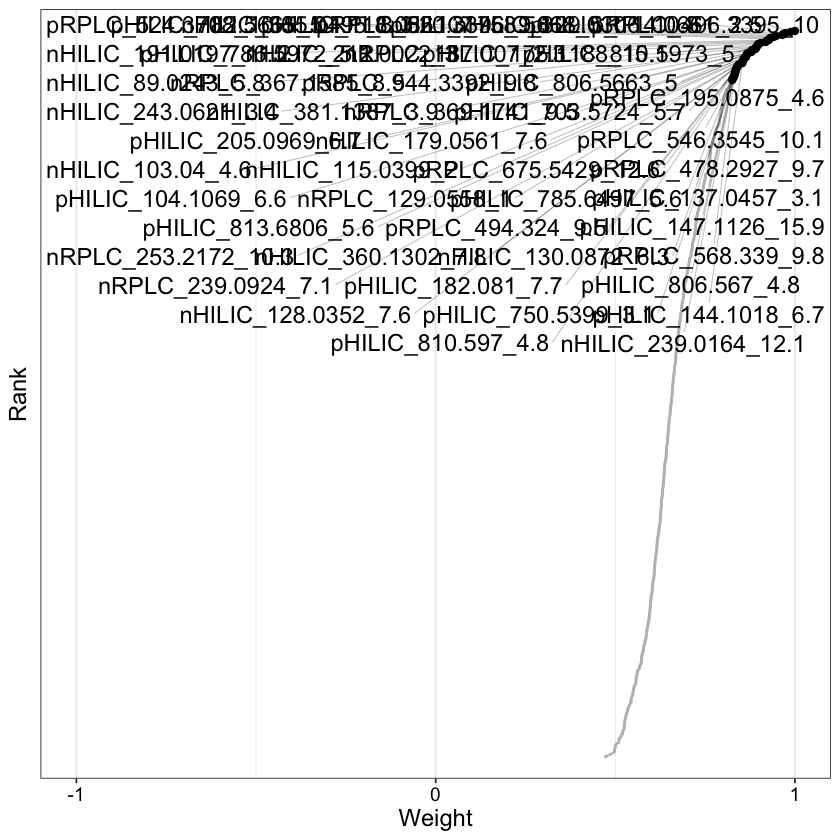

In [28]:
plot_weights(MOFA_object,
             view = "metabolomics",
             factor = 1,
             nfeatures = 50,     # Number of features to highlight
             scale = T,          # Scale weights from -1 to 1
             abs = F             # Take the absolute value?
)

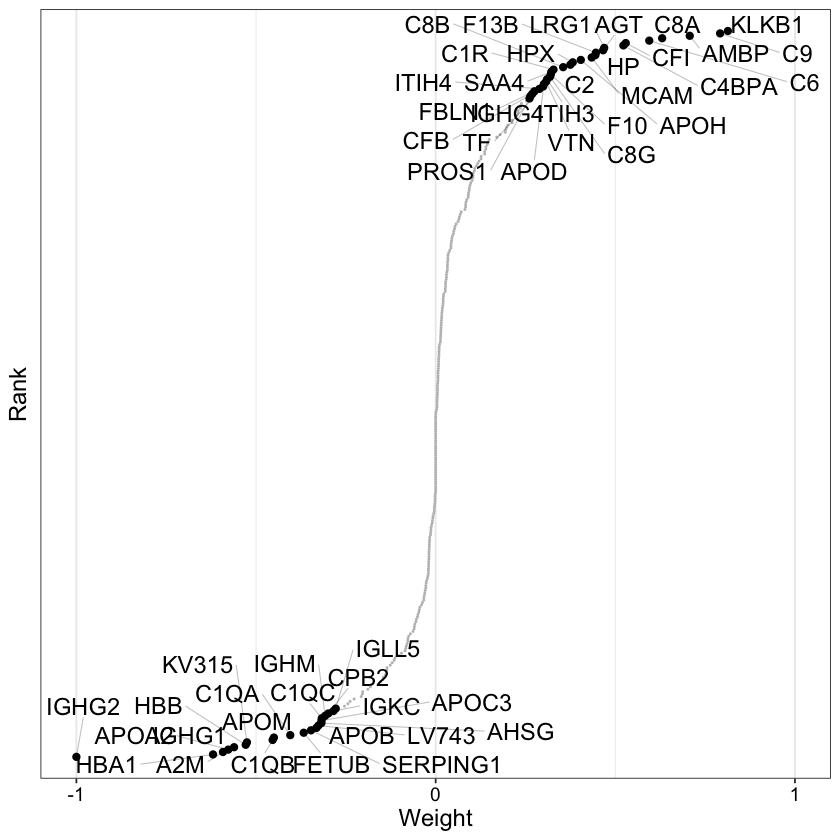

In [29]:
plot_weights(MOFA_object,
             view = "protiomics",
             factor = 1,
             nfeatures = 50,     # Number of features to highlight
             scale = T,          # Scale weights from -1 to 1
             abs = F             # Take the absolute value?
)


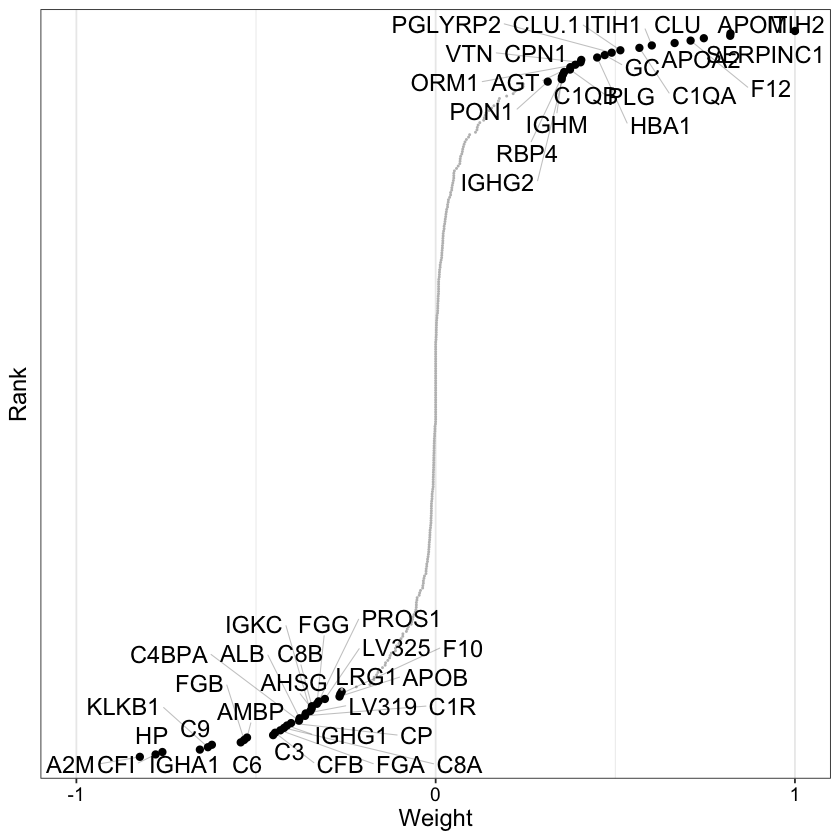

In [30]:
plot_weights(MOFA_object,
             view = "protiomics",
             factor = 2,
             nfeatures = 50,     # Number of features to highlight
             scale = T,          # Scale weights from -1 to 1
             abs = F             # Take the absolute value?
)

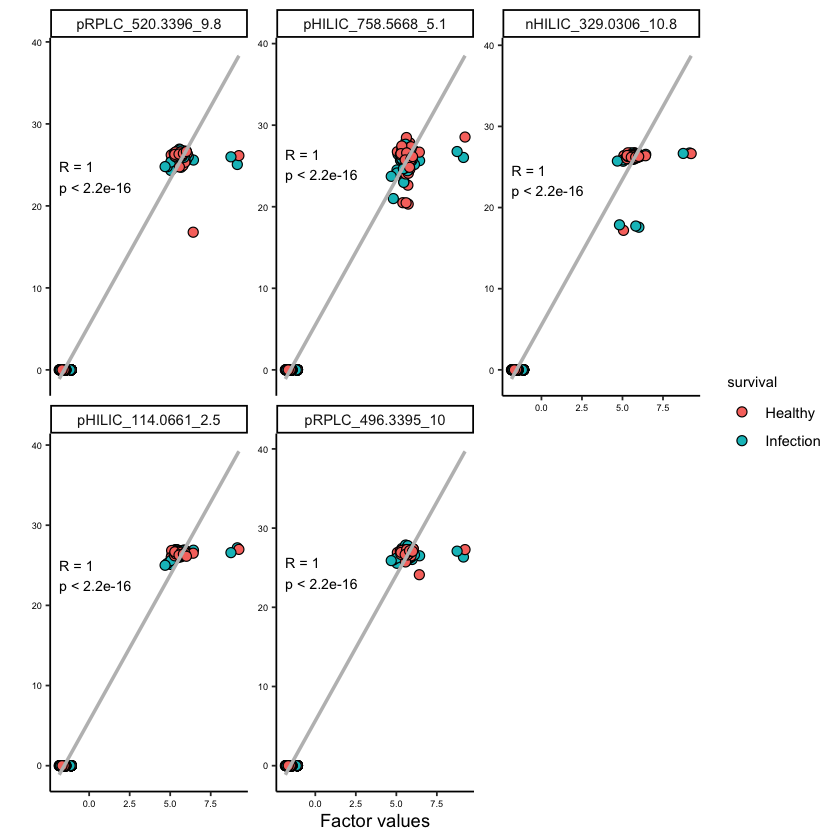

In [31]:
plot_data_scatter(MOFA_object,
                  view = "metabolomics",         # view of interest
                  factor = 1,             # factor of interest
                  features = 5,           # number of features to plot (they are selected by weight)
                  add_lm = TRUE,          # add linear regression
                  color_by = "survival"
)


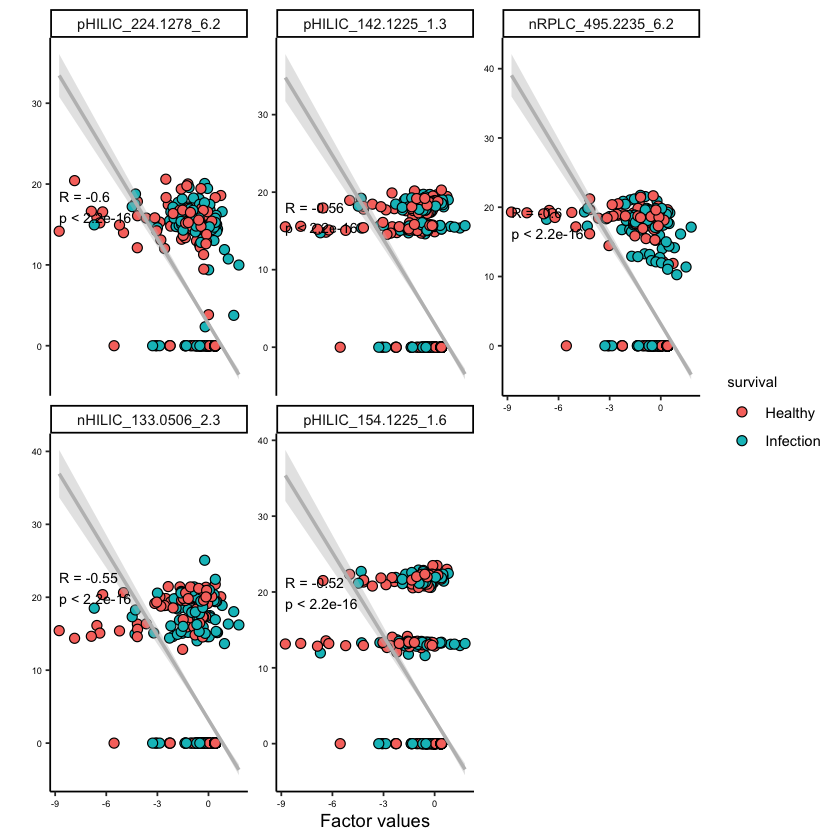

In [32]:
plot_data_scatter(MOFA_object,
                  view = "metabolomics",         # view of interest
                  factor = 2,             # factor of interest
                  features = 5,           # number of features to plot (they are selected by weight)
                  add_lm = TRUE,          # add linear regression
                  color_by = "survival"
)


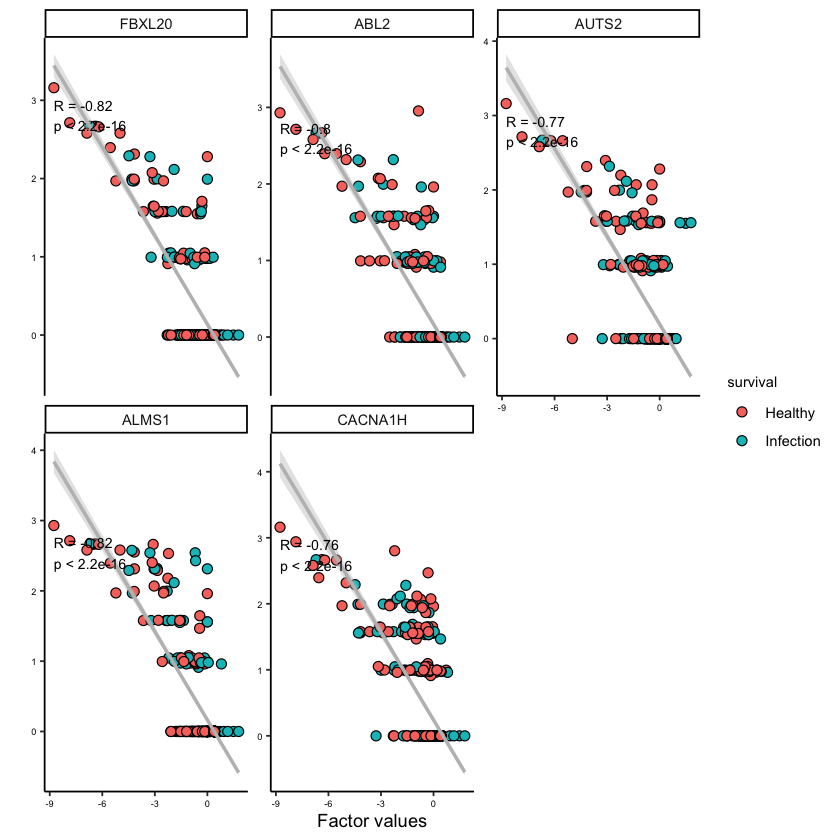

In [33]:
plot_data_scatter(MOFA_object,
                  view = "mRNA",         # view of interest
                  factor = 2,             # factor of interest
                  features = 5,           # number of features to plot (they are selected by weight)
                  add_lm = TRUE,          # add linear regression
                  color_by = "survival"
)

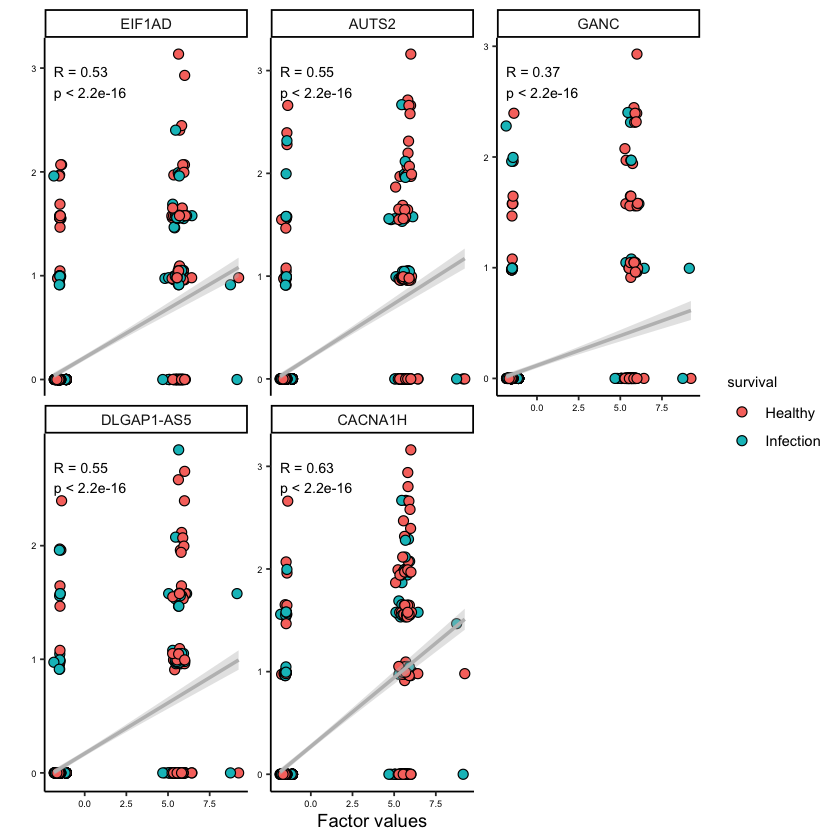

In [34]:
plot_data_scatter(MOFA_object,
                  view = "mRNA",         # view of interest
                  factor = 1,             # factor of interest
                  features = 5,           # number of features to plot (they are selected by weight)
                  add_lm = TRUE,          # add linear regression
                  color_by = "survival"
)

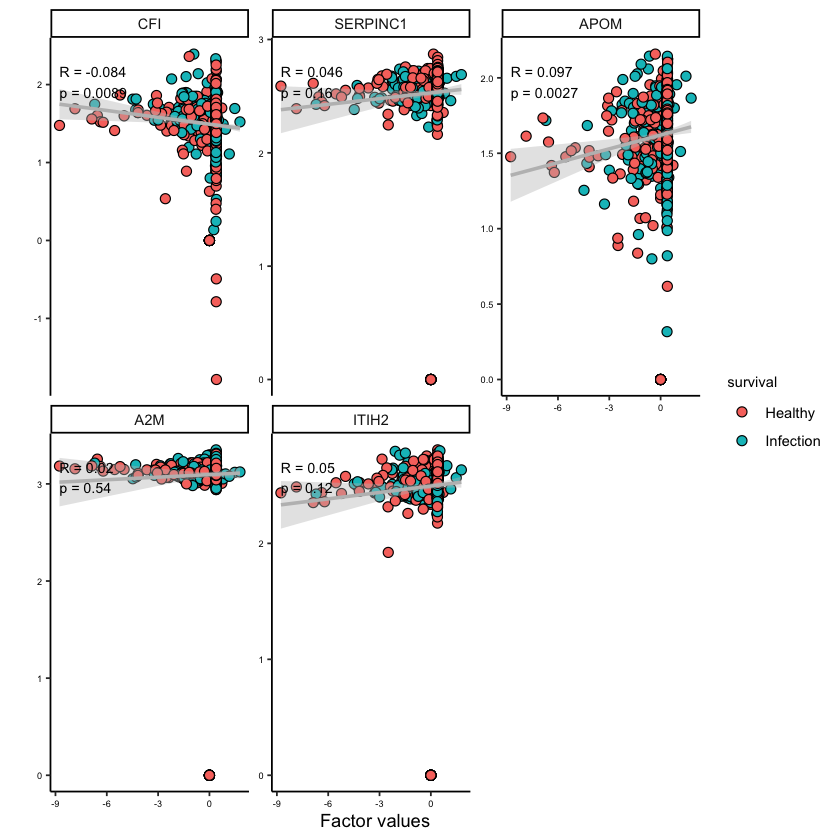

In [36]:
plot_data_scatter(MOFA_object,
                  view = "protiomics",         # view of interest
                  factor = 2,             # factor of interest
                  features = 5,           # number of features to plot (they are selected by weight)
                  add_lm = TRUE,          # add linear regression
                  color_by = "survival"
)

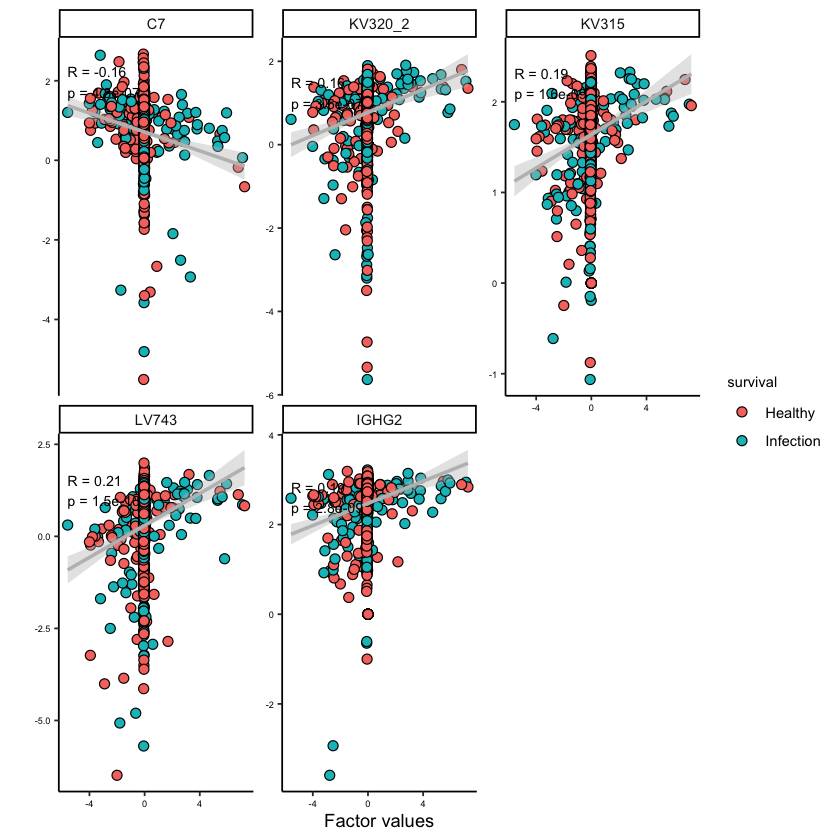

In [37]:
plot_data_scatter(MOFA_object,
                  view = "protiomics",         # view of interest
                  factor = 4,             # factor of interest
                  features = 5,           # number of features to plot (they are selected by weight)
                  add_lm = TRUE,          # add linear regression
                  color_by = "survival"
)

UMAP embedding was not computed. Running run_umap()...

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.
ℹ The deprecated feature was likely used in the MOFA2 package.
  Please report the issue at <https://github.com/bioFAM/MOFA2>.”


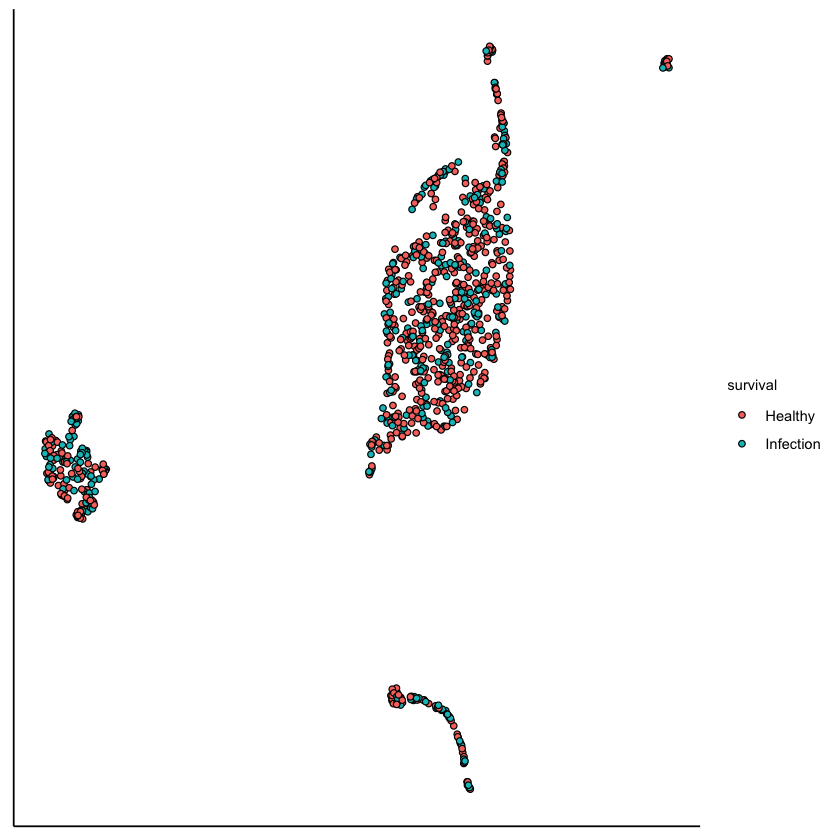

In [35]:
MOFA_object <- run_tsne(MOFA_object)
plot_dimred(MOFA_object,
            method = "UMAP",  # method can be either "TSNE" or "UMAP"
            color_by = "survival"
)